# Using clustering technique for customer data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Fe

In [5]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [6]:
df.shape

(200, 5)

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.isnull()

CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
5         False   False  False               False                   False
6         False   False  False               False                   False
7         False   False  False               False                   False
8         False   False  False               False                   False
9         False   False  False               False                   False
10        False   False  False               False                   False
11        False   False  False               False                   False
12        False   False  False               False                   False
13        False   False  False               False                   False
14        False   False  False               False                   False
15        False   False  False               False                   False
16        False   False  False               False                   False
17        False   False  False               False                   False
18        False   False  False               False                   False
19        False   False  False               False                   False
20        False   False  False               False                   False
21        False   False  False               False                   False
22        False   False  False               False                   False
23        False   False  False               False                   False
24        False   False  False               False                   False
25        False   False  False               False                   False
26        False   False  False               False                   False
27        False   False  False               False                   False
28        False   False  False               False                   False
29        False   False  False               False                   False
30        False   False  False               False                   False
31        False   False  False               False                   False
32        False   False  False               False                   False
33        False   False  False               False                   False
34        False   False  False               False                   False
35        False   False  False               False                   False
36        False   False  False               False                   False
37        False   False  False               False                   False
38        False   False  False               False                   False
39        False   False  False               False                   False
40        False   False  False               False                   False
41        False   False  False               False                   False
42        False   False  False               False                   False
43        False   False  False               False                   False
44        False   False  False               False                   False
45        False   False  False               False                   False
46        False   False  False               False                   False
47        False   False  False               False                   False
48        False   False  False               False                   False
49        False   False  False               False                   False
50        False   False  False               False                   False
51        False   False  False               False                   False
52        False   False  False

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

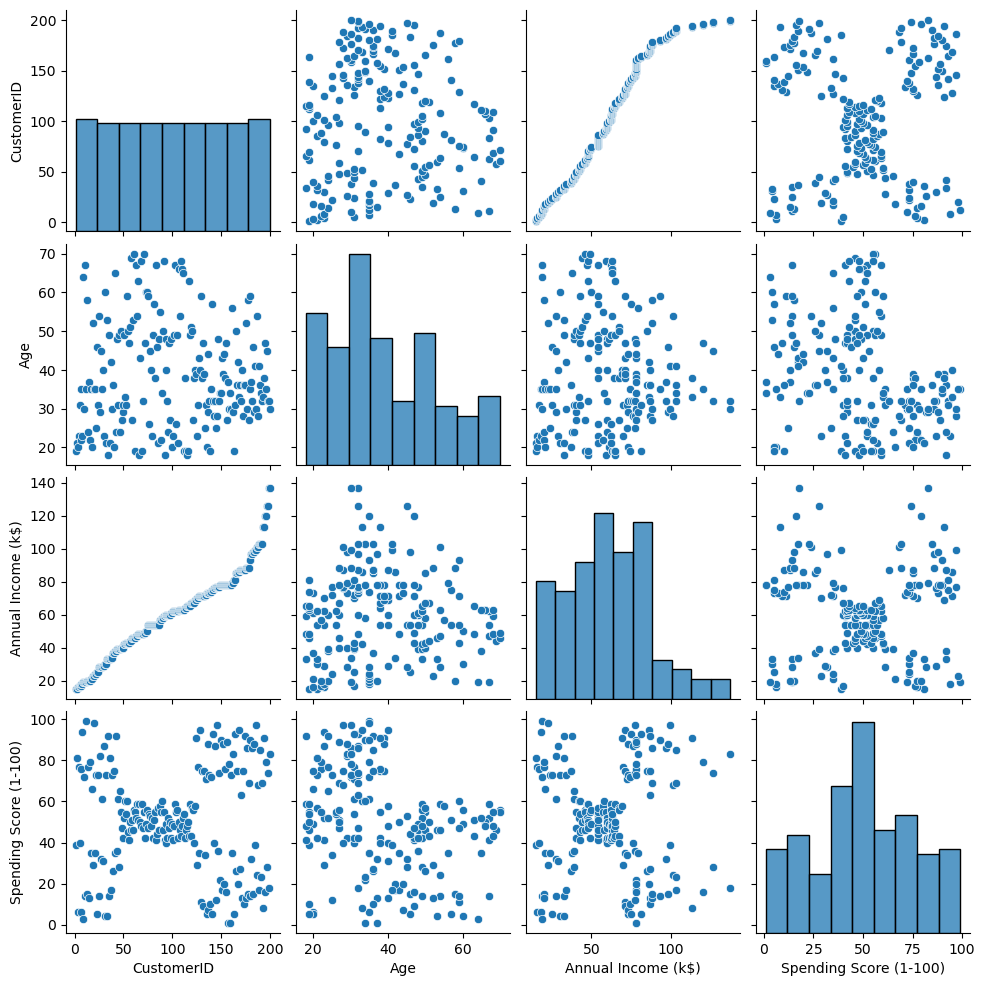

In [11]:
sns.pairplot(df)

In [12]:
X=df.iloc[:,[3,4]].values

In [13]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
#kmeans++ is used to intial the values of centroid
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #segregate data points into clusters

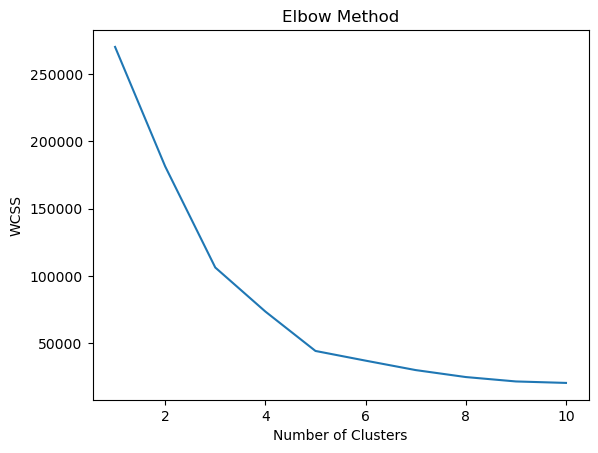

In [16]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [17]:
model= KMeans(n_clusters=5, init='k-means++', random_state=0)


In [18]:
y=model.fit_predict(X)

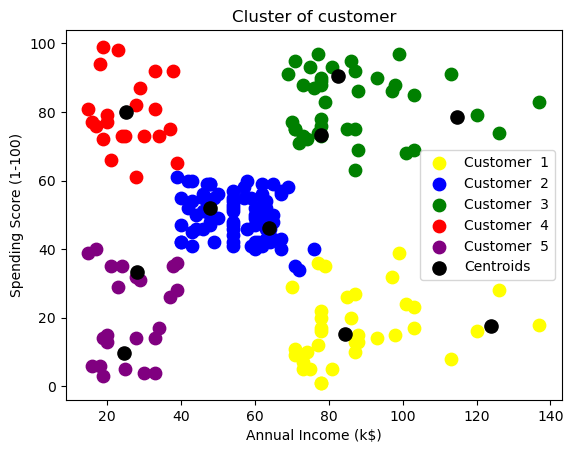

In [19]:
plt.scatter(X[y==0,0],X[y==0,1],s=80,c="yellow",label='Customer  1')
plt.scatter(X[y==1,0],X[y==1,1],s=80,c="blue",label='Customer  2')
plt.scatter(X[y==2,0],X[y==2,1],s=80,c="green",label='Customer  3')
plt.scatter(X[y==3,0],X[y==3,1],s=80,c="red",label='Customer  4')
plt.scatter(X[y==4,0],X[y==4,1],s=80,c="purple",label='Customer  5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=90,c='black',label='Centroids')
plt.title("Cluster of customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()